Importing and initialising


In [ ]:
import numpy as np
from PIL import Image
import random
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Do not use this code if you are not importing file form google drive

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Uploading Image and converting pixels in numpy array**

In [ ]:
image_1 = Image.open(r"/content/drive/MyDrive/KDAG TASK 2 PICS/1.png")
image_2 = Image.open(r"/content/drive/MyDrive/KDAG TASK 2 PICS/2.png")
image_3 = Image.open(r"/content/drive/MyDrive/KDAG TASK 2 PICS/3.png")
image_4 = Image.open(r"/content/drive/MyDrive/KDAG TASK 2 PICS/4.png")
arr_1 = np.array(image_1)

# DO NOT FORGET TO CHANGE TO CHANGE PATH ACC TO YOUR COMPUTER :)
# ALSO arr_1 = np.array(image_i), put i as 1/ 2/ 3/4

In [ ]:
print('Red element => No. of light sources = No. of white pixels:')
count_red = 0
for i in range(64):
  for j in  range(64):
    if(arr_1[i][j][0] == 255):
      # print(f"i: {i}, j: {j}")
      count_red = count_red + 1
print(count_red)  # This just shows no. of light sources.

Red element => No. of light sources = No. of white pixels:
129


In [ ]:
#To take the indices of the light sources and store them into a numpy array
light_source_index = []
x = 0
for i in range(64):
  for j in range(64):
    if(arr_1[i][j][0] == 255):
      light_source_index.append([i, j])
      x += 1
light_source_index = np.array(light_source_index)

In [ ]:
#To determine the centroid using mean of the coordinates of elements in each cluster
def new_centroids(clustered_points):
    new_coords = []
    for cluster_points in clustered_points:
        if cluster_points:  # Check if the cluster has any points
            # Calculate the mean coordinates of the points in the cluster
            mean_coord = np.mean(cluster_points, axis=0)
            new_coords.append(mean_coord)
    return np.array(new_coords)

In [ ]:
#To assign each point to the nearest cluster centroid
def assign_points_to_clusters(data_points, centroids):
    num_clusters = centroids.shape[0]
    clustered_points = [[] for _ in range(num_clusters)]
    cluster_indices = []  # New addition to store cluster indices
    for point in data_points:
        distances = [calculate_distance(point, centroid) for centroid in centroids]
        cluster_index = np.argmin(distances)
        clustered_points[cluster_index].append(point)
        cluster_indices.append(cluster_index)  # Store the cluster index for each point
    return clustered_points, np.array(cluster_indices)

In [ ]:
#To calculate every distance between a point and the cluster centroid
def src_cls_distances(src_coord, cls_coord, cls_cnt, src_cnt):
    distances = np.zeros((cls_cnt, src_cnt))
    for cluster in range(cls_cnt):
        for source in range(src_cnt):
            if source < len(src_coord) and cluster < len(cls_coord):
                distance_sq = np.linalg.norm(src_coord[source] - cls_coord[cluster])
                distances[cluster][source] = np.sqrt(distance_sq)
    return distances

In [ ]:
#To calculate the distance between 2 points
def calculate_distance(point1, point2):
    return np.sqrt(np.sum((point1 - point2) ** 2))

In [ ]:
#K- Means Method
def kmeans(data_points, k, max_iterations=1000, tolerance=1e-4):
    # Initialize centroids randomly
    centroids_indices = np.random.choice(len(data_points), k, replace=False)
    centroids = data_points[centroids_indices]

    for i in range(max_iterations):
        # Assign points to clusters
        clustered_points, _ = assign_points_to_clusters(data_points, centroids)
        # Update centroids using the new_centroids function
        new_centroids_val = new_centroids(clustered_points)
        # Check for convergence
        if np.linalg.norm(new_centroids_val - centroids) < tolerance:
            break
        centroids = new_centroids_val
    return centroids, clustered_points

In [ ]:
#To calculate WCSS(Within cluster sum of squares)
def calculate_wcss(centroids, clustered_points):
    wcss = 0
    for i in range(len(centroids)):
        centroid = centroids[i]
        cluster_points = clustered_points[i]
        wcss += np.sum((cluster_points - centroid) ** 2)
    return wcss

In [ ]:
# Find optimal value of k using wcss values
def find_optimal_k(data_points, max_clusters=10):
    wcss_values = []
    for k in range(1, max_clusters + 1):
        centroids, clustered_points = kmeans(data_points, k)
        wcss = calculate_wcss(centroids, clustered_points)
        wcss_values.append(wcss)
    return wcss_values

In [ ]:
data_points = light_source_index

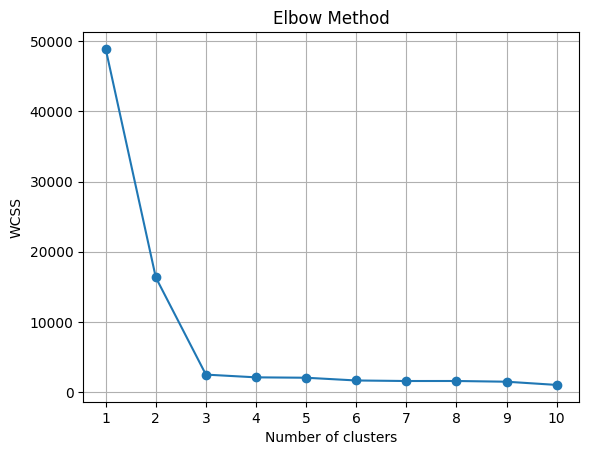

In [ ]:
#Plotting k vs elbow method
wcss_values = find_optimal_k(data_points)
x = range(1, len(wcss_values) + 1)
plt.plot(x, wcss_values, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method')
plt.xticks(x)
plt.grid(True)
plt.show()

In [ ]:
k = int(input("Enter k after visual inspection: "))

Enter k after visual inspection: 3


In [ ]:
def run_kmeans_and_calculate_distances(data_points, k):
    # Run k-means with the specified number of clusters (k)
    centroids, _ = kmeans(data_points, k)
    # Calculate pairwise distances between final cluster centroids
    distances = np.zeros((k, k))
    for i in range(k):
        for j in range(i+1, k):
            distances[i][j] = np.linalg.norm(centroids[i] - centroids[j])
            distances[j][i] = distances[i][j]  # Symmetric matrix
    return centroids, distances

In [ ]:
optimal_k = k  # Obtained through visual inspection
centroids, distances = run_kmeans_and_calculate_distances(data_points, optimal_k)

In [ ]:
print("Centroids:")
print(centroids)

Centroids:
[[33.43478261 16.45652174]
 [19.7        58.425     ]
 [38.93023256 40.81395349]]


In [ ]:
for i in range(optimal_k):
    for j in range(i+1, optimal_k):
        print(f"Distance between cluster {i+1} and {j+1} is {distances[i][j]}")

Distance between cluster 1 and 2 is 44.158775128406916
Distance between cluster 1 and 3 is 24.969670633907217
Distance between cluster 2 and 3 is 26.075866303439494
